In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler

from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split



In [192]:
df_vessel = pd.read_csv("/Users/eli/Desktop/Wallenius Wilhelmsen Task/20220321_AisVdcJoined.csv")
df_vessel.head()

,name,timestamp,latitude_deg,longitude_deg,course,speed,in_port,OP_CODE_NAME_SHORT
0,Tamesis,2020-12-24 02:30:00,-32.3693,170.4633,252,18.8,0,4
1,Tamesis,2020-12-24 03:00:00,-32.4223,170.2852,252,18.9,0,4
2,Torrens,2020-12-24 00:02:00,30.5557,127.2458,290,16.6,0,4
3,Tortugas,2020-12-24 00:02:00,9.6135,-79.9599,339,16.8,0,4
4,Oberon,2020-12-24 00:01:00,-29.4287,73.7375,104,14.0,0,4


In [193]:
df_vessel.columns

Index(['name', 'timestamp', 'latitude_deg', 'longitude_deg', 'course', 'speed',
       'in_port', 'OP_CODE_NAME_SHORT'],
      dtype='object')

In [194]:
df_vessel.columns=df_vessel.columns.str.replace(' ','')

In [195]:
df_vessel.columns = df_vessel.columns.str.lower()

In [196]:
df_vessel.columns

Index(['name', 'timestamp', 'latitude_deg', 'longitude_deg', 'course', 'speed',
       'in_port', 'op_code_name_short'],
      dtype='object')

In [197]:
df_vessel = df_vessel.rename(columns = {'latitude_deg': 'lat_deg'})

In [198]:
df_vessel = df_vessel.rename(columns = {'longitude_deg': 'long_deg'})

In [199]:
df_vessel = df_vessel.rename(columns = {'op_code_name_short': 'op_code'})

In [200]:
df_vessel.columns

Index(['name', 'timestamp', 'lat_deg', 'long_deg', 'course', 'speed',
       'in_port', 'op_code'],
      dtype='object')

In [201]:
df_vessel.shape

(3110192, 8)

In [202]:
df_no_dupli = df_vessel.drop_duplicates(keep='first')

In [203]:
df_no_dupli.shape

(3108716, 8)

In [226]:
df_no_dupli.describe()

,lat_deg,long_deg,course,speed,in_port,op_code
count,3.108716e+06,3.108716e+06,3.108716e+06,3.108716e+06,3.108716e+06,3.108716e+06
mean,1.909930e+01,1.317517e+01,1.837326e+02,1.167779e+01,1.555086e-01,3.521294e+00
std,2.802766e+01,1.009998e+02,1.019997e+02,7.213217e+00,3.623889e-01,8.609282e-01
min,-5.613380e+01,-1.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.384900e+00,-7.653790e+01,9.200000e+01,3.000000e+00,0.000000e+00,3.000000e+00
50%,2.977450e+01,3.227500e+00,1.890000e+02,1.511880e+01,0.000000e+00,4.000000e+00
75%,3.924040e+01,1.216682e+02,2.730000e+02,1.727862e+01,0.000000e+00,4.000000e+00
max,5.968460e+01,1.799993e+02,3.600000e+02,3.200000e+01,1.000000e+00,4.000000e+00


In [227]:
df_no_dupli['op_code'].value_counts(dropna=False)

4    2188782
3     526315
2     240380
1     131871
0      21368
Name: op_code, dtype: int64

Text(0.5, 0, 'Percentage')

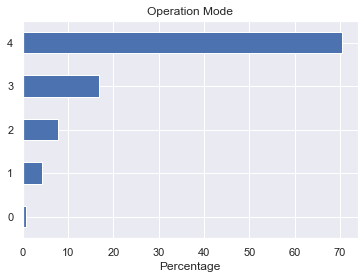

In [228]:
(df_no_dupli.op_code.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='b')
plt.title('Operation Mode')
plt.xlabel('Percentage')


In [230]:
df_no_dupli['in_port'].value_counts(dropna=False)

0    2625284
1     483432
Name: in_port, dtype: int64

Text(0.5, 0, 'Percentage')

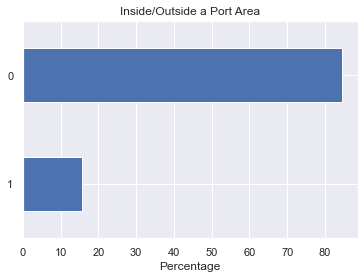

In [231]:
(df_no_dupli.in_port.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='b')
plt.title('Inside/Outside a Port Area')
plt.xlabel('Percentage')

In [232]:
df_no_dupli['name'].value_counts(dropna = False)

Don Juan          80794
Toledo            80268
Torrens           78861
Tugela            78357
Toreador          78201
Tulane            78188
Thermopylae       77733
Tortugas          77616
Tamerlane         77447
Fidelio           77428
Tarago            77134
Oberon            77042
Tijuca            77027
Tongala           76905
Toronto           76822
Don Pasquale      76115
Tirranna          75950
Thalatta          75837
Tombarra          75824
Tysla             75732
Figaro            75689
Parsifal          75649
Tamesis           75472
Talisman          75297
Manon             75234
Toscana           74864
Torino            74250
Aniara            74234
Turandot          74098
Tonsberg          73575
Salome            73225
Carmen            72464
ARC Defender      68818
Undine            65607
Tiger             64007
Morning Chorus    61797
Titania           58543
Elektra           57283
Tosca             54531
Mignon            53917
Don Carlos        50236
Don Quijote     

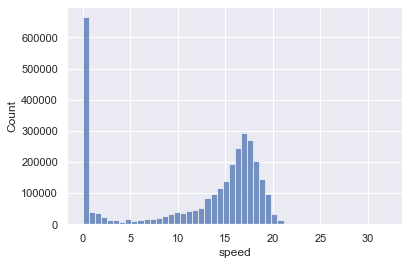

In [233]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=df_no_dupli, x="speed", bins=50)
plt.show()

In [239]:
df_speed = df_no_dupli[['name','speed']]
df_speed.sort_values('speed')

,name,speed
3110191,Fidelio,0.0
923304,Toledo,0.0
923305,Torrens,0.0
923306,Toledo,0.0
923307,Tirranna,0.0
...,...,...
706030,Talisman,25.3
706050,Talisman,25.4
1286532,Theben,25.5
1437272,Tombarra,32.0


In [243]:
df_vessel.isnull().sum()

name         0
timestamp    0
lat_deg      0
long_deg     0
course       0
speed        0
in_port      0
op_code      0
dtype: int64

In [244]:
missing_values = ["n/a", "na", "--", "-", "NA", "NAN", "?", "n.a."]
df_vessel = pd.read_csv("/Users/eli/Desktop/Wallenius Wilhelmsen Task/20220321_AisVdcJoined.csv", na_values = missing_values)

# Making a list of missing value types

In [245]:
df_no_dupli.isnull().sum()

name         0
timestamp    0
lat_deg      0
long_deg     0
course       0
speed        0
in_port      0
op_code      0
dtype: int64

In [246]:
df_no_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3108716 entries, 0 to 3110191
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   name       object 
 1   timestamp  object 
 2   lat_deg    float64
 3   long_deg   float64
 4   course     int64  
 5   speed      float64
 6   in_port    int64  
 7   op_code    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 213.5+ MB


In [247]:
df_no_dupli.name.unique()

array(['Tamesis', 'Torrens', 'Tortugas', 'Oberon', 'Figaro', 'Parsifal',
       'Tamerlane', 'Tugela', 'Undine', 'Tijuca', 'Don Pasquale',
       'Fidelio', 'Morning Chorus', 'Don Juan ', 'Tirranna', 'Toledo',
       'ARC Defender', 'Tombarra', 'Tongala', 'Tonsberg', 'Toreador',
       'Torino', 'Toronto', 'Tosca', 'Turandot', 'Toscana', 'Talisman',
       'Tulane', 'Manon', 'Thermopylae', 'Salome', 'Titania', 'Tysla',
       'Theben', 'Tarago', 'Tiger', 'Carmen', 'Thalatta', 'Themis',
       'Aniara', 'Elektra', 'Mignon', 'Don Quijote', 'Don Carlos',
       'Titus', 'Traviata', 'Tannhauser', 'Nabucco'], dtype=object)

In [248]:
df_no_dupli.shape

(3108716, 8)

In [249]:
name_df_vessel = df_no_dupli['name']

In [250]:
type(name_df_vessel)

pandas.core.series.Series

In [251]:
df_vessel.iloc[3000000]

name                                Manon
timestamp             2022-02-10 14:58:00
latitude_deg                      17.4306
longitude_deg                     40.4827
course                                330
speed                           18.898495
in_port                                 0
OP_CODE_NAME_SHORT                      4
Name: 3000000, dtype: object

In [252]:
df_no_dupli.isnull()

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3110187,False,False,False,False,False,False,False,False
3110188,False,False,False,False,False,False,False,False
3110189,False,False,False,False,False,False,False,False
3110190,False,False,False,False,False,False,False,False


In [253]:
df_vessel.isnull().sum()

name                  0
timestamp             0
latitude_deg          0
longitude_deg         0
course                0
speed                 0
in_port               0
OP_CODE_NAME_SHORT    0
dtype: int64

In [254]:
df_vessel.isna().sum()

name                  0
timestamp             0
latitude_deg          0
longitude_deg         0
course                0
speed                 0
in_port               0
OP_CODE_NAME_SHORT    0
dtype: int64

In [255]:
df_vessel.isnull().any()

name                  False
timestamp             False
latitude_deg          False
longitude_deg         False
course                False
speed                 False
in_port               False
OP_CODE_NAME_SHORT    False
dtype: bool

In [256]:
df_no_dupli.nunique()

name              48
timestamp     774291
lat_deg       805374
long_deg     1536036
course           361
speed            345
in_port            2
op_code            5
dtype: int64

In [257]:
df_no_dupli['in_port'].unique()

array([0, 1])

In [258]:
df_no_dupli['op_code'].unique()

array([4, 1, 3, 2, 0])

In [259]:
df_no_dupli['speed'].value_counts()

0.000000     604190
16.738667     42211
15.658753     40027
16.198710     37220
17.278624     34450
              ...  
32.000000         2
24.400000         2
24.700000         1
25.500000         1
25.400000         1
Name: speed, Length: 345, dtype: int64

In [260]:
df_no_dupli.sort_values('speed')

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
3110191,Fidelio,2022-03-09 20:58:00,39.2402,-76.5340,359,0.0,1,1
923304,Toledo,2020-08-08 05:24:00,51.4926,-2.7186,170,0.0,1,3
923305,Torrens,2020-08-11 22:34:00,51.3137,3.2276,158,0.0,1,3
923306,Toledo,2020-08-08 05:54:00,51.4926,-2.7186,170,0.0,1,3
923307,Tirranna,2020-08-11 22:38:00,39.2403,-76.5341,161,0.0,1,3
...,...,...,...,...,...,...,...,...
706030,Talisman,2021-04-28 00:41:00,37.2227,-71.6316,83,25.3,0,4
706050,Talisman,2021-04-28 00:48:00,37.2292,-71.5659,83,25.4,0,4
1286532,Theben,2020-11-06 20:20:00,41.3516,140.3259,56,25.5,0,4
1437272,Tombarra,2021-06-14 15:01:00,36.9810,126.8255,173,32.0,1,3


In [261]:
df_no_dupli[df_no_dupli.speed > 25]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
706030,Talisman,2021-04-28 00:41:00,37.2227,-71.6316,83,25.3,0,4
706050,Talisman,2021-04-28 00:48:00,37.2292,-71.5659,83,25.4,0,4
706083,Talisman,2021-04-28 01:03:00,37.2440,-71.4344,81,25.3,0,4
713084,Talisman,2021-04-28 01:18:00,37.2593,-71.3031,83,25.2,0,4
713085,Talisman,2021-04-28 01:26:00,37.2664,-71.2380,82,25.2,0,4
1219350,Talisman,2020-12-13 01:43:00,48.1695,-122.7462,310,25.2,0,1
1286532,Theben,2020-11-06 20:20:00,41.3516,140.3259,56,25.5,0,4
1437272,Tombarra,2021-06-14 15:01:00,36.9810,126.8255,173,32.0,1,3
2248088,Tannhauser,2021-09-28 06:11:00,51.3164,3.2252,117,32.0,1,3


In [262]:
df_no_outlier = df_no_dupli[df_no_dupli.speed < 28]
df_no_outlier

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
0,Tamesis,2020-12-24 02:30:00,-32.3693,170.4633,252,18.8,0,4
1,Tamesis,2020-12-24 03:00:00,-32.4223,170.2852,252,18.9,0,4
2,Torrens,2020-12-24 00:02:00,30.5557,127.2458,290,16.6,0,4
3,Tortugas,2020-12-24 00:02:00,9.6135,-79.9599,339,16.8,0,4
4,Oberon,2020-12-24 00:01:00,-29.4287,73.7375,104,14.0,0,4
...,...,...,...,...,...,...,...,...
3110187,Tijuca,2022-03-09 20:33:00,32.1225,-117.5333,69,0.9,0,2
3110188,Fidelio,2022-03-09 20:43:00,39.2402,-76.5342,73,0.1,1,1
3110189,Tijuca,2022-03-09 20:48:00,32.1236,-117.5288,80,0.9,0,2
3110190,Tijuca,2022-03-09 20:56:00,32.1266,-117.5280,353,5.0,0,2


/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

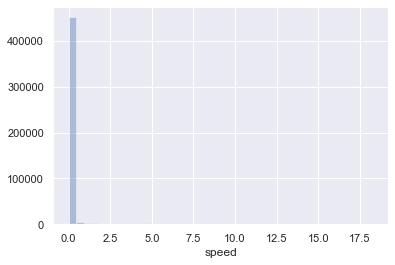

In [364]:
df_in_port_1 = df_no_outlier[df_no_outlier.in_port==1]
sns.distplot(a=df_in_port_1["speed"], hist=True, kde=False, rug=False, bins=40)

In [362]:
#z-score
df_in_port_1.speed.mean()
df_in_port_1.speed.std()
upper_limit = df_in_port_1.speed.mean() + 3*df_in_port_1.speed.std()
lower_limit = df_in_port_1.speed.mean() - 3*df_in_port_1.speed.std()
df_in_port_1[(df_in_port_1.speed<lower_limit) | (df_in_port_1.speed>upper_limit)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
1183,Torino,2020-12-24 06:00:00,38.9646,117.8248,283,11.000000,1,1
1212,Torino,2020-12-24 06:10:00,38.9792,117.7928,320,9.900000,1,1
1244,Torino,2020-12-24 06:16:00,38.9918,117.7838,340,8.400000,1,1
1281,Torino,2020-12-24 06:30:00,39.0157,117.7756,350,4.600000,1,1
1334,Morning Chorus,2020-12-24 06:46:00,8.9777,-79.5793,344,4.859610,1,1
...,...,...,...,...,...,...,...,...
3109110,Elektra,2022-03-08 19:06:00,40.6894,-74.1349,328,4.859613,1,1
3109143,Toreador,2022-03-09 07:33:00,39.0196,121.8721,307,7.000000,1,1
3109224,Tulane,2022-03-08 20:28:00,35.0154,136.8032,211,6.100000,1,1
3109290,Don Pasquale,2022-03-08 21:02:00,35.1772,128.5880,345,9.179269,1,1


In [363]:
# IQR Interquartile range
Q1 = df_in_port_1.speed.quantile(0.25)
Q3 = df_in_port_1.speed.quantile(0.75)
IQR = Q3 - Q1
lower_limit_in_port_1 = Q1 - 1.5*IQR
upper_limit_in_port_1 = Q3 + 1.5*IQR
df_in_port_1[(df_in_port_1.speed<lower_limit_in_port_1) | (df_in_port_1.speed>upper_limit_in_port_1)]


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
43,Tulane,2020-12-24 00:10:00,47.2733,-122.4054,132,3.2,1,1
76,Tulane,2020-12-24 00:18:00,47.2688,-122.3980,132,3.1,1,1
102,Tulane,2020-12-24 00:33:00,47.2597,-122.3832,133,2.6,1,1
144,Tulane,2020-12-24 00:41:00,47.2577,-122.3783,334,1.3,1,1
147,Figaro,2020-12-24 00:51:00,50.8830,-1.3963,355,1.0,1,1
...,...,...,...,...,...,...,...,...
3109945,Tugela,2022-03-09 10:47:00,40.6976,-74.1459,302,0.1,1,1
3110092,Tirranna,2022-03-09 16:06:00,51.3127,3.2280,280,0.6,1,1
3110097,Tirranna,2022-03-09 16:17:00,51.3267,3.2232,347,3.8,1,1
3110186,Fidelio,2022-03-09 20:36:00,39.2382,-76.5343,357,2.4,1,1


/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

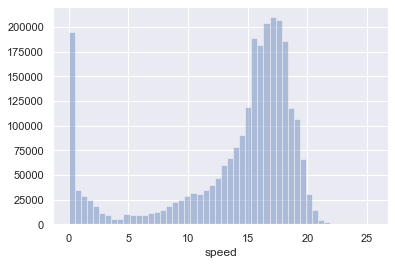

In [359]:
df_in_port_0 = df_no_outlier[df_no_outlier.in_port==0]
sns.distplot(a=df_in_port_0["speed"], hist=True, kde=False, rug=False, bins=50)

In [367]:
#z-score
df_in_port_0.speed.mean()
df_in_port_0.speed.std()
upper_limit = df_in_port_0.speed.mean() + 3*df_in_port_0.speed.std()
lower_limit = df_in_port_0.speed.mean() - 3*df_in_port_0.speed.std()
df_in_port_0[(df_in_port_0.speed<lower_limit) | (df_in_port_0.speed>upper_limit)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code


In [368]:
# IQR Interquartile range
Q1 = df_in_port_0.speed.quantile(0.25)
Q3 = df_in_port_0.speed.quantile(0.75)
IQR = Q3 - Q1
lower_limit_in_port_0 = Q1 - 1.5*IQR
upper_limit_in_port_0 = Q3 + 1.5*IQR
df_in_port_0[(df_in_port_0.speed<lower_limit_in_port_0) | (df_in_port_0.speed>upper_limit_in_port_0)]


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
9,Undine,2020-12-24 02:53:00,58.1139,7.0401,88,0.0,0,3
15,Morning Chorus,2020-12-24 00:03:00,8.8661,-79.5344,139,0.0,0,3
24,Tongala,2020-12-24 00:08:00,24.9888,-94.9773,344,0.9,0,4
30,Undine,2020-12-24 00:08:00,58.1140,7.0402,88,0.0,0,3
37,Morning Chorus,2020-12-24 02:49:00,8.8659,-79.5343,139,0.0,0,3
...,...,...,...,...,...,...,...,...
3110183,Tijuca,2022-03-09 20:18:00,32.1215,-117.5372,77,0.1,0,2
3110184,Fidelio,2022-03-09 20:27:00,39.2305,-76.5397,20,3.9,0,1
3110185,Tijuca,2022-03-09 20:26:00,32.1219,-117.5353,66,1.0,0,2
3110187,Tijuca,2022-03-09 20:33:00,32.1225,-117.5333,69,0.9,0,2


/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

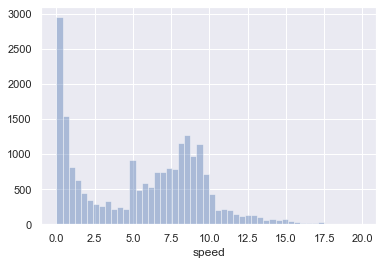

In [300]:
df_op_code_0 = df_no_outlier[df_no_outlier.op_code==0]
sns.distplot(a=df_op_code_0["speed"], hist=True, kde=False, rug=False, bins=50)

In [270]:
df_op_code_0.sort_values('speed')

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
330112,Tosca,2021-02-19 20:55:00,9.0014,-79.5960,125,0.0,1,0
942838,Toreador,2020-08-28 12:09:00,9.2265,-79.9295,89,0.0,1,0
337635,Tysla,2021-02-24 21:01:00,9.0011,-79.5962,146,0.0,1,0
337667,Tysla,2021-02-24 21:39:00,8.9960,-79.5912,149,0.0,1,0
942827,Toreador,2020-08-28 11:39:00,9.2267,-79.9298,89,0.0,1,0
...,...,...,...,...,...,...,...,...
719418,Tysla,2021-04-30 06:31:00,33.6310,131.7850,153,19.5,0,0
719345,Tysla,2021-04-30 06:00:00,33.7639,131.6701,104,19.6,0,0
719433,Tysla,2021-04-30 06:39:00,33.5942,131.8071,154,19.7,0,0
719463,Tysla,2021-04-30 06:46:00,33.5570,131.8287,155,19.8,0,0


In [273]:
#z-score
df_op_code_0.speed.mean()
df_op_code_0.speed.std()
upper_limit = df_op_code_0.speed.mean() + 3*df_op_code_0.speed.std()
lower_limit = df_op_code_0.speed.mean() - 3*df_op_code_0.speed.std()
df_op_code_0[(df_op_code_0.speed<lower_limit) | (df_op_code_0.speed>upper_limit)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
714745,Tysla,2021-04-30 05:00:00,33.8326,131.2947,106,18.50000,0,0
719107,Tysla,2021-04-30 04:43:00,33.8573,131.1995,124,17.80000,0,0
719154,Tysla,2021-04-30 04:52:00,33.8447,131.2503,106,18.50000,0,0
719220,Tysla,2021-04-30 05:22:00,33.8068,131.4339,103,19.00000,0,0
719243,Tysla,2021-04-30 05:30:00,33.7983,131.4804,103,19.00000,0,0
719282,Tysla,2021-04-30 05:40:00,33.7862,131.5465,102,19.10000,0,0
719306,Tysla,2021-04-30 05:52:00,33.7730,131.6219,101,19.50000,0,0
719345,Tysla,2021-04-30 06:00:00,33.7639,131.6701,104,19.60000,0,0
719377,Tysla,2021-04-30 06:16:00,33.7038,131.7407,154,19.50000,0,0
719418,Tysla,2021-04-30 06:31:00,33.6310,131.7850,153,19.50000,0,0


In [274]:
# IQR Interquartile range
Q1 = df_op_code_0.speed.quantile(0.25)
Q3 = df_op_code_0.speed.quantile(0.75)
IQR = Q3 - Q1
lower_limit_op_code_0 = Q1 - 1.5*IQR
upper_limit_op_code_0 = Q3 + 1.5*IQR
df_op_code_0[(df_op_code_0.speed<lower_limit_op_code_0) | (df_op_code_0.speed>upper_limit_op_code_0)]


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
719463,Tysla,2021-04-30 06:46:00,33.5570,131.8287,155,19.8,0,0
719527,Tysla,2021-04-30 07:01:00,33.4803,131.8697,154,19.9,0,0


In [302]:
#No Outlier op_code_0 using IQR
df_op_code_0_no_outlier = df_op_code_0[(df_op_code_0.speed>lower_limit_op_code_0) & (df_op_code_0.speed<upper_limit_op_code_0)]
df_op_code_0_no_outlier.shape


(21366, 8)

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

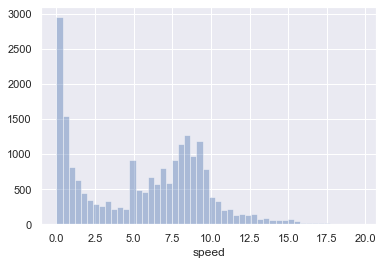

In [303]:
df_op_code_0 = df_op_code_0_no_outlier[df_op_code_0_no_outlier.op_code==0]
sns.distplot(a=df_op_code_0["speed"], hist=True, kde=False, rug=False, bins=50)

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

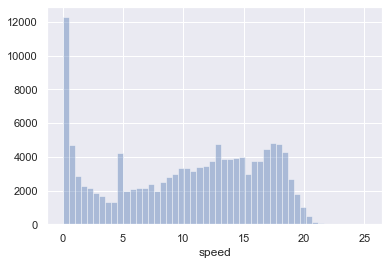

In [306]:
df_op_code_1 = df_no_outlier[df_no_outlier.op_code==1]
sns.distplot(a=df_op_code_1["speed"], hist=True, kde=False, rug=False)

In [307]:
df_op_code_1

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
5,Figaro,2020-12-24 00:00:00,50.8084,-1.2912,3,11.2,0,1
12,Figaro,2020-12-24 00:10:00,50.8312,-1.3129,325,7.0,0,1
32,Figaro,2020-12-24 00:22:00,50.8498,-1.3386,312,10.6,0,1
43,Tulane,2020-12-24 00:10:00,47.2733,-122.4054,132,3.2,1,1
76,Tulane,2020-12-24 00:18:00,47.2688,-122.3980,132,3.1,1,1
...,...,...,...,...,...,...,...,...
3110182,Fidelio,2022-03-09 20:12:00,39.2124,-76.5234,318,5.5,0,1
3110184,Fidelio,2022-03-09 20:27:00,39.2305,-76.5397,20,3.9,0,1
3110186,Fidelio,2022-03-09 20:36:00,39.2382,-76.5343,357,2.4,1,1
3110188,Fidelio,2022-03-09 20:43:00,39.2402,-76.5342,73,0.1,1,1


In [308]:
df_op_code_1.shape

(131871, 8)

In [309]:
#Considered as Outlier because way more than mean of Sea Passage Speed
#No Outlier op_code_1
df_op_code_1_no_outlier = df_op_code_1[df_no_dupli.speed < 22]
df_op_code_1_no_outlier.shape

<ipython-input-309-edd5d4f77e71>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_op_code_1_no_outlier = df_op_code_1[df_no_dupli.speed < 22]


(131809, 8)

In [310]:
#z-score
df_op_code_1.speed.mean()
df_op_code_1.speed.std()
upper_limit = df_op_code_1.speed.mean() + 3*df_op_code_1.speed.std()
lower_limit = df_op_code_1.speed.mean() - 3*df_op_code_1.speed.std()
df_op_code_1[(df_op_code_1.speed<lower_limit) | (df_op_code_1.speed>upper_limit)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code


In [311]:
upper_limit

28.67923397370877

In [312]:
# IQR
Q1 = df_op_code_1.speed.quantile(0.25)
Q3 = df_op_code_1.speed.quantile(0.75)
IQR = Q3 - Q1
lower_limit_op_code_1 = Q1 - 1.5*IQR
upper_limit_op_code_1 = Q3 + 1.5*IQR
df_op_code_1[(df_op_code_1.speed<lower_limit_op_code_1) | (df_op_code_1.speed>upper_limit_op_code_1)]


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code


In [313]:
upper_limit_op_code_1

31.4

In [316]:
df_op_code_2 = df_no_outlier[df_no_outlier.op_code==2]
df_op_code_2.sort_values('speed')

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
1462821,Salome,2021-06-17 01:51:00,29.9070,122.2252,182,0.0,0,2
2905617,Tirranna,2022-01-27 02:55:00,1.2915,104.0041,125,0.0,1,2
1416188,Turandot,2021-06-10 21:14:00,31.1448,122.7233,176,0.0,0,2
1416140,Turandot,2021-06-10 20:59:00,31.1450,122.7234,176,0.0,0,2
1416122,Don Juan,2021-06-10 21:03:00,-36.6983,174.8580,174,0.0,0,2
...,...,...,...,...,...,...,...,...
2525109,Toledo,2021-11-17 08:24:00,54.1191,7.4888,152,18.7,0,2
2525256,Toledo,2021-11-17 08:52:00,53.9935,7.6094,152,18.7,0,2
2525194,Toledo,2021-11-17 08:44:00,54.0278,7.5760,149,18.8,0,2
2525020,Toledo,2021-11-17 08:07:00,54.2015,7.4222,157,18.8,0,2


<AxesSubplot:xlabel='speed'>

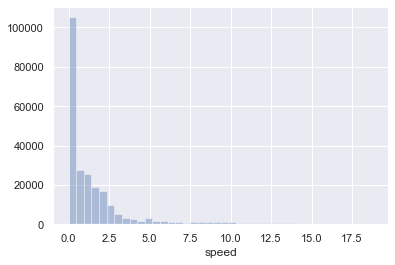

In [321]:
sns.distplot( a=df_op_code_2["speed"], hist=True, kde=False, rug=False,bins=40)

In [322]:
#z-score
df_op_code_2.speed.mean()
df_op_code_2.speed.std()
upper_limit = df_op_code_2.speed.mean() + 3*df_op_code_2.speed.std()
lower_limit = df_op_code_2.speed.mean() - 3*df_op_code_2.speed.std()
df_op_code_2[(df_op_code_2.speed<lower_limit) | (df_op_code_2.speed>upper_limit)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
1187,Toscana,2020-12-24 05:56:00,-29.8577,31.1599,97,14.8,0,2
1217,Toscana,2020-12-24 06:11:00,-29.8589,31.2370,94,16.2,0,2
1249,Toscana,2020-12-24 06:19:00,-29.8602,31.2763,93,16.6,0,2
1285,Toscana,2020-12-24 06:26:00,-29.8595,31.3154,88,16.1,0,2
1320,Toscana,2020-12-24 06:41:00,-29.8568,31.3886,87,12.6,0,2
...,...,...,...,...,...,...,...,...
3100725,Tirranna,2022-03-05 23:44:00,51.3621,2.7018,96,10.8,0,2
3109547,Toreador,2022-03-09 00:36:00,38.6873,121.9889,11,13.3,0,2
3109561,Toreador,2022-03-09 00:44:00,38.7179,121.9984,18,13.3,0,2
3109571,Toreador,2022-03-09 00:52:00,38.7444,122.0094,22,13.3,0,2


In [323]:
upper_limit

9.700353111657241

In [324]:
lower_limit

-6.449434878068539

In [325]:
# IQR
Q1 = df_op_code_2.speed.quantile(0.25)
Q3 = df_op_code_2.speed.quantile(0.75)
IQR = Q3 - Q1
lower_limit_op_code_2 = Q1 - 1.5*IQR
upper_limit_op_code_2 = Q3 + 1.5*IQR
df_op_code_2[(df_op_code_2.speed<lower_limit_op_code_2) | (df_op_code_2.speed>upper_limit_op_code_2)]


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
1021,Toscana,2020-12-24 05:12:00,-29.9031,31.1456,323,7.9,0,2
1055,Toscana,2020-12-24 05:21:00,-29.8918,31.1361,329,5.6,0,2
1116,Toscana,2020-12-24 05:38:00,-29.8690,31.1284,337,4.9,0,2
1156,Toscana,2020-12-24 05:48:00,-29.8567,31.1276,67,7.3,0,2
1187,Toscana,2020-12-24 05:56:00,-29.8577,31.1599,97,14.8,0,2
...,...,...,...,...,...,...,...,...
3109889,Carmen,2022-03-09 05:47:00,-39.1188,147.4874,76,6.9,0,2
3109903,Carmen,2022-03-09 05:54:00,-39.1156,147.5056,76,6.3,0,2
3109912,Carmen,2022-03-09 06:05:00,-39.1095,147.5328,59,8.5,0,2
3110170,Tijuca,2022-03-09 19:15:00,32.0991,-117.5389,14,7.1,0,2


In [326]:
lower_limit_op_code_2

-2.8499999999999996

In [327]:
upper_limit_op_code_2

4.75

In [328]:
df_op_code_2.shape

(240380, 8)

In [329]:
# No Outlier op_code_2 (considered z-score becasue it removes less data, e.g. maybe vessels move around while waitng)
df_op_code_2_no_outlier = df_op_code_2[(df_op_code_2.speed>lower_limit) & (df_op_code_2.speed<upper_limit)]
df_op_code_2_no_outlier.shape

(232773, 8)

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

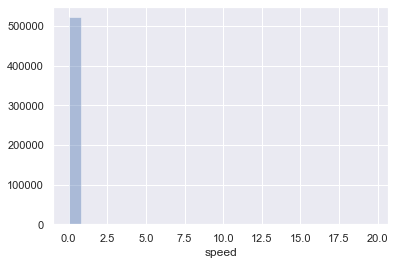

In [296]:
df_op_code_3 = df_no_outlier[df_no_outlier.op_code==3]
sns.distplot( a=df_op_code_3["speed"], hist=True, kde=False, rug=False, bins=25)

In [330]:
df_op_code_3

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
9,Undine,2020-12-24 02:53:00,58.1139,7.0401,88,0.0,0,3
13,Don Pasquale,2020-12-24 00:01:00,53.5747,8.5582,67,0.0,1,3
15,Morning Chorus,2020-12-24 00:03:00,8.8661,-79.5344,139,0.0,0,3
25,Tonsberg,2020-12-24 00:03:00,51.3143,3.2272,124,0.0,1,3
30,Undine,2020-12-24 00:08:00,58.1140,7.0402,88,0.0,0,3
...,...,...,...,...,...,...,...,...
3110059,Tirranna,2022-03-09 14:49:00,51.3140,3.2272,167,0.0,1,3
3110064,Tirranna,2022-03-09 15:04:00,51.3128,3.2284,182,0.0,1,3
3110073,Tirranna,2022-03-09 15:19:00,51.3128,3.2284,182,0.0,1,3
3110082,Tirranna,2022-03-09 15:34:00,51.3128,3.2284,182,0.0,1,3


In [331]:
#z-score
df_op_code_3.speed.mean()
df_op_code_3.speed.std()
upper_limit_op_code_3 = df_op_code_3.speed.mean() + 3*df_op_code_3.speed.std()
lower_limit_op_code_3 = df_op_code_3.speed.mean() - 3*df_op_code_3.speed.std()
df_op_code_3[(df_op_code_3.speed<lower_limit_op_code_3) | (df_op_code_3.speed>upper_limit_op_code_3)]


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
5660,Parsifal,2020-12-25 05:40:00,35.2014,128.5887,206,3.239740,1,3
5686,Tiger,2020-12-25 05:49:00,35.1862,128.5890,355,8.000000,1,3
5693,Parsifal,2020-12-25 05:52:00,35.1805,128.5872,182,4.859610,1,3
14677,Tarago,2020-12-27 04:59:00,39.2410,-76.5469,277,5.000000,0,3
14697,Tarago,2020-12-27 05:04:00,39.2437,-76.5560,313,5.400000,0,3
...,...,...,...,...,...,...,...,...
3103598,Elektra,2022-03-06 16:38:00,44.6303,-63.5313,127,3.239742,1,3
3104121,Tulane,2022-03-07 07:28:00,35.4649,139.7012,43,4.200000,1,3
3104297,Tulane,2022-03-07 07:37:00,35.4742,139.6963,277,4.400000,0,3
3105549,Don Pasquale,2022-03-07 21:24:00,35.5204,129.3882,258,3.239742,1,3


In [332]:
upper_limit_op_code_3

2.7767868563906015

In [333]:
lower_limit_op_code_3

-2.651296504235141

In [334]:
# IQR 
Q1 = df_op_code_3.speed.quantile(0.25)
Q3 = df_op_code_3.speed.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_op_code_3[(df_op_code_3.speed<lower_limit) | (df_op_code_3.speed>upper_limit)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
518,Tarago,2020-12-27 04:47:00,39.2407,-76.5358,308,1.600000,1,3
994,Morning Chorus,2020-12-24 05:04:00,8.8665,-79.5341,352,0.539957,0,3
1332,Tarago,2020-12-27 05:28:00,39.2551,-76.5773,199,1.300000,0,3
2749,Torino,2020-12-24 13:54:00,39.0211,117.7684,188,0.100000,1,3
5569,Tiger,2020-12-25 05:05:00,35.1677,128.5877,212,0.100000,1,3
...,...,...,...,...,...,...,...,...
3106291,Don Carlos,2022-03-07 13:33:00,-32.0415,115.7493,22,1.079914,1,3
3108408,Don Pasquale,2022-03-08 08:15:00,35.5184,129.3794,86,3.239742,1,3
3108425,Don Pasquale,2022-03-08 08:23:00,35.5214,129.3898,4,2.699785,1,3
3108441,Don Pasquale,2022-03-08 08:30:00,35.5228,129.3904,49,0.200000,1,3


In [335]:
upper_limit

0.0

In [336]:
lower_limit

0.0

In [337]:
df_op_code_3.shape

(526313, 8)

In [339]:
# No Outlier op_code_3 based on z-score
df_op_code_3_no_outlier = df_op_code_3[(df_op_code_3.speed>lower_limit_op_code_3) & (df_op_code_3.speed<upper_limit_op_code_3)]
df_op_code_3_no_outlier.shape

(523826, 8)

In [340]:
df_op_code_4 = df_no_outlier[df_no_outlier.op_code==4]
df_op_code_4.sort_values('speed')

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
527494,Tortugas,2021-03-25 16:39:00,8.8917,-79.4749,315,0.0,0,4
604217,Tirranna,2021-04-09 01:34:00,53.5768,8.5588,234,0.0,1,4
464865,Turandot,2021-03-14 02:35:00,35.5200,129.3924,13,0.0,1,4
604177,Tirranna,2021-04-09 01:19:00,53.5768,8.5588,234,0.0,1,4
630770,Tirranna,2021-04-14 19:09:00,50.8839,-1.3960,167,0.0,1,4
...,...,...,...,...,...,...,...,...
713084,Talisman,2021-04-28 01:18:00,37.2593,-71.3031,83,25.2,0,4
706030,Talisman,2021-04-28 00:41:00,37.2227,-71.6316,83,25.3,0,4
706083,Talisman,2021-04-28 01:03:00,37.2440,-71.4344,81,25.3,0,4
706050,Talisman,2021-04-28 00:48:00,37.2292,-71.5659,83,25.4,0,4


In [341]:
mean_speed_df_op_code_4 = df_op_code_4['speed'].mean()
mean_speed_df_op_code_4

15.726237947879444

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

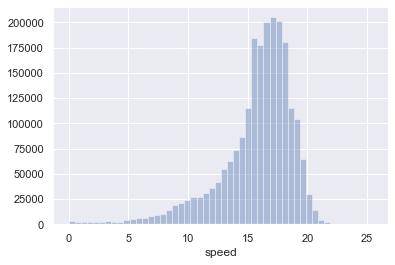

In [342]:
sns.distplot( a=df_op_code_4["speed"], hist=True, kde=False, rug=False,bins=50)

In [343]:
#z-score
df_op_code_4.speed.mean()
df_op_code_4.speed.std()
upper_limit_op_code_4 = df_op_code_4.speed.mean() + 3*df_op_code_4.speed.std()
lower_limit_op_code_4 = df_op_code_4.speed.mean() - 3*df_op_code_4.speed.std()
df_op_code_4[(df_op_code_4.speed<lower_limit_op_code_4) | (df_op_code_4.speed>upper_limit_op_code_4)]


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
24,Tongala,2020-12-24 00:08:00,24.9888,-94.9773,344,0.9,0,4
60,Tongala,2020-12-24 00:23:00,24.9934,-94.9775,353,1.1,0,4
93,Tongala,2020-12-24 00:30:00,24.9956,-94.9778,351,0.9,0,4
128,Tongala,2020-12-24 00:38:00,24.9976,-94.9780,353,1.1,0,4
170,Tongala,2020-12-24 00:46:00,24.9993,-94.9782,357,0.6,0,4
...,...,...,...,...,...,...,...,...
3109899,Tysla,2022-03-09 05:49:00,33.7106,136.9599,236,1.5,0,4
3109911,Tysla,2022-03-09 05:57:00,33.7088,136.9566,238,1.4,0,4
3109921,Tysla,2022-03-09 06:04:00,33.7071,136.9533,239,1.5,0,4
3110062,Thermopylae,2022-03-09 15:06:00,-26.6064,153.4685,354,2.9,0,4


In [344]:
upper_limit_op_code_4

25.221318844450273

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

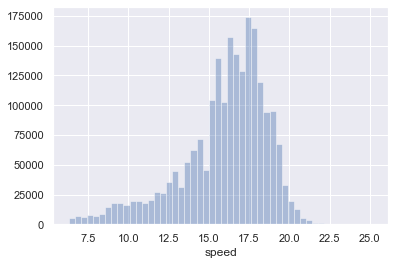

In [345]:
df_no_outlier_op_code_4 = df_op_code_4[(df_op_code_4.speed>lower_limit_op_code_4) & (df_op_code_4.speed<upper_limit_op_code_4)]
sns.distplot(a=df_no_outlier_op_code_4["speed"], hist=True, kde=False, rug=False, bins=50)

In [346]:
# IQR 
Q1 = df_op_code_4.speed.quantile(0.25)
Q3 = df_op_code_4.speed.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_op_code_4[(df_op_code_4.speed<lower_limit) | (df_op_code_4.speed>upper_limit)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
7,Tamerlane,2020-12-24 00:01:00,39.5127,-124.9311,338,9.6,0,4
24,Tongala,2020-12-24 00:08:00,24.9888,-94.9773,344,0.9,0,4
41,Tamerlane,2020-12-24 00:09:00,39.5318,-124.9408,340,9.6,0,4
60,Tongala,2020-12-24 00:23:00,24.9934,-94.9775,353,1.1,0,4
93,Tongala,2020-12-24 00:30:00,24.9956,-94.9778,351,0.9,0,4
...,...,...,...,...,...,...,...,...
3110127,Thermopylae,2022-03-09 17:22:00,-26.7060,153.1930,231,9.0,0,4
3110162,Tysla,2022-03-09 18:48:00,34.0695,134.9706,358,8.7,0,4
3110165,Tysla,2022-03-09 18:55:00,34.0857,134.9700,3,8.6,0,4
3110168,Tysla,2022-03-09 19:01:00,34.1006,134.9741,19,8.7,0,4


/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

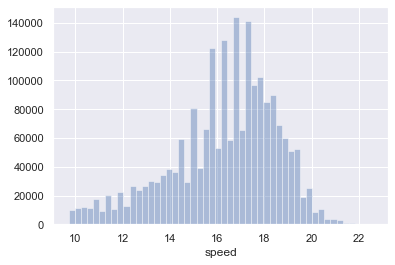

In [347]:
df_no_outlier_op_code_4 = df_op_code_4[(df_op_code_4.speed>lower_limit) & (df_op_code_4.speed<upper_limit)]
sns.distplot(a=df_no_outlier_op_code_4["speed"], hist=True, kde=False, rug=False,bins=50)


In [348]:
df_op_code_4.shape

(2188782, 8)

In [349]:
# No Outlier op_code_4 with z-score
df_op_code_4_no_outlier = df_op_code_4[(df_op_code_4.speed>lower_limit_op_code_4) & (df_op_code_4.speed<upper_limit_op_code_4)]
df_op_code_4_no_outlier.shape


(2150988, 8)

## No Outlier DataFrame


In [350]:
#No Outlier DataFrame
new_df_no_outlier = pd.concat([df_op_code_0_no_outlier, df_op_code_1_no_outlier, df_op_code_2_no_outlier, df_op_code_3_no_outlier, df_op_code_4_no_outlier])
new_df_no_outlier


,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
4094,Talisman,2020-12-25 14:51:00,9.0523,-79.6539,323,6.9,1,0
4337,Talisman,2020-12-25 15:02:00,9.0680,-79.6704,320,9.4,1,0
5049,Talisman,2020-12-25 14:21:00,9.0188,-79.6150,312,2.3,1,0
6250,ARC Defender,2020-12-25 08:31:00,8.8798,-79.4780,23,0.6,0,0
6289,ARC Defender,2020-12-25 08:37:00,8.8825,-79.4805,271,5.0,0,0
...,...,...,...,...,...,...,...,...
3110164,Tijuca,2022-03-09 18:57:00,32.0359,-117.5540,11,15.8,0,4
3110165,Tysla,2022-03-09 18:55:00,34.0857,134.9700,3,8.6,0,4
3110167,Tijuca,2022-03-09 19:06:00,32.0714,-117.5457,12,13.5,0,4
3110168,Tysla,2022-03-09 19:01:00,34.1006,134.9741,19,8.7,0,4


In [85]:
new_df_no_dupli=new_df_no_outlier.drop_duplicates(keep='first')
new_df_no_dupli.shape

(3060762, 8)

In [178]:
new_df_no_outlier_no_scaling = new_df_no_dupli
new_df_no_outlier_no_scaling

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
4094,Talisman,2020-12-25 14:51:00,9.0523,-79.6539,323,6.9,1,0
4337,Talisman,2020-12-25 15:02:00,9.0680,-79.6704,320,9.4,1,0
5049,Talisman,2020-12-25 14:21:00,9.0188,-79.6150,312,2.3,1,0
6250,ARC Defender,2020-12-25 08:31:00,8.8798,-79.4780,23,0.6,0,0
6289,ARC Defender,2020-12-25 08:37:00,8.8825,-79.4805,271,5.0,0,0
...,...,...,...,...,...,...,...,...
3110164,Tijuca,2022-03-09 18:57:00,32.0359,-117.5540,11,15.8,0,4
3110165,Tysla,2022-03-09 18:55:00,34.0857,134.9700,3,8.6,0,4
3110167,Tijuca,2022-03-09 19:06:00,32.0714,-117.5457,12,13.5,0,4
3110168,Tysla,2022-03-09 19:01:00,34.1006,134.9741,19,8.7,0,4


In [351]:
new_df_no_outlier.shape

(3060762, 8)

In [352]:
df_no_outlier.shape

(3108714, 8)

In [88]:
df_no_dupli[(df_no_dupli.op_code==3) & (df_no_dupli.speed>18)]

,name,timestamp,lat_deg,long_deg,course,speed,in_port,op_code
742674,Tortugas,2021-05-09 02:12:00,30.4516,-79.0201,139,18.2,0,3
742743,Tortugas,2021-05-09 02:27:00,30.3940,-78.9602,138,18.8,0,3
742773,Tortugas,2021-05-09 02:42:00,30.3348,-78.8992,139,18.9,0,3
742811,Tortugas,2021-05-09 02:50:00,30.3048,-78.8688,138,19.2,0,3
742842,Tortugas,2021-05-09 02:57:00,30.2748,-78.8375,137,19.3,0,3
...,...,...,...,...,...,...,...,...
1914654,Toscana,2021-08-14 09:17:00,-19.8580,-70.5022,180,18.1,0,3
1915055,Toscana,2021-08-14 11:17:00,-20.4576,-70.5000,179,18.1,0,3
1925824,Toscana,2021-08-12 13:37:00,-16.0413,-74.4624,123,18.2,0,3
2248088,Tannhauser,2021-09-28 06:11:00,51.3164,3.2252,117,32.0,1,3


In [89]:
df_no_dupli['lat_deg'].value_counts()

 58.1140    18514
 58.1137     5489
 51.3129     5154
 58.1147     5089
 51.3128     4434
            ...  
 16.3624        1
-16.8162        1
-16.0265        1
-13.5300        1
-23.2169        1
Name: lat_deg, Length: 805374, dtype: int64

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat_deg'>

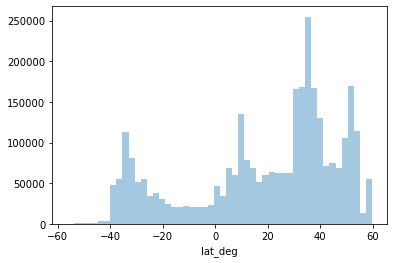

In [90]:
sns.distplot(a=df_no_dupli['lat_deg'], hist=True, kde=False, rug=False)

<AxesSubplot:xlabel='long_deg'>

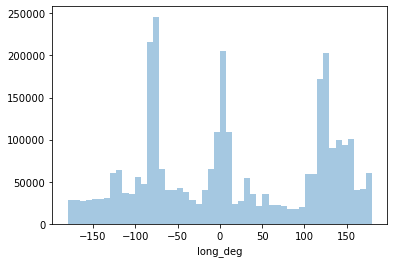

In [91]:
sns.distplot(a=df_no_dupli['long_deg'], hist=True, kde=False, rug=False)

### One hot encoding

In [306]:
categorical_cols = ['in_port', 'op_code'] 
df_new_encoded = pd.get_dummies(new_df_no_outlier, columns = categorical_cols)
df_new_encoded

,name,timestamp,lat_deg,long_deg,course,speed,in_port_0.0,in_port_1.0,op_code_-4.0,op_code_-3.0,op_code_-2.0,op_code_-1.0,op_code_0.0
4094,Talisman,2020-12-25 14:51:00,-0.595236,-0.418079,323,-0.584507,0,1,1,0,0,0,0
4337,Talisman,2020-12-25 15:02:00,-0.594783,-0.418163,320,-0.408451,0,1,1,0,0,0,0
5049,Talisman,2020-12-25 14:21:00,-0.596202,-0.417883,312,-0.908451,0,1,1,0,0,0,0
6250,ARC Defender,2020-12-25 08:31:00,-0.600209,-0.417192,23,-1.028169,1,0,1,0,0,0,0
6289,ARC Defender,2020-12-25 08:37:00,-0.600131,-0.417205,271,-0.718310,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110164,Tijuca,2022-03-09 18:57:00,0.067353,-0.609259,11,0.042254,1,0,0,0,0,0,1
3110165,Tysla,2022-03-09 18:55:00,0.126446,0.664549,3,-0.464789,1,0,0,0,0,0,1
3110167,Tijuca,2022-03-09 19:06:00,0.068376,-0.609217,12,-0.119718,1,0,0,0,0,0,1
3110168,Tysla,2022-03-09 19:01:00,0.126875,0.664569,19,-0.457746,1,0,0,0,0,0,1


## Scaling
   ### Used Robust Scaler because it is robust against outliers

In [158]:
new_df_no_outlier[['lat_deg','long_deg','speed','in_port','op_code']] = RobustScaler().fit_transform(new_df_no_outlier[['lat_deg','long_deg','speed','in_port','op_code']])
new_df_no_outlier

,lat_deg,long_deg,course,speed,in_port,op_code
4094,-0.595236,-0.418079,323,-0.584507,1.0,-4.0
4337,-0.594783,-0.418163,320,-0.408451,1.0,-4.0
5049,-0.596202,-0.417883,312,-0.908451,1.0,-4.0
6250,-0.600209,-0.417192,23,-1.028169,0.0,-4.0
6289,-0.600131,-0.417205,271,-0.718310,0.0,-4.0
...,...,...,...,...,...,...
3110164,0.067353,-0.609259,11,0.042254,0.0,0.0
3110165,0.126446,0.664549,3,-0.464789,0.0,0.0
3110167,0.068376,-0.609217,12,-0.119718,0.0,0.0
3110168,0.126875,0.664569,19,-0.457746,0.0,0.0


In [159]:
new_df_no_outlier.drop(['name','timestamp'], axis = 1, inplace = True)

KeyError: "['name' 'timestamp'] not found in axis"

In [ ]:
new_df_no_outlier

## Linear Regression Model

In [160]:
# new_df_no_outlier=new_df_no_outlier.sample(n=1000000, axis=0, replace=True)
# new_df_no_outlier

In [161]:
# new_df_no_outlier.plot(x='in_port', y='op_code', style='o')  
# plt.title('in_port vs op_code')  
# plt.xlabel('in_port')  
# plt.ylabel('op_code')  
# plt.show()

In [162]:
# sns.regplot(x=new_df_no_outlier["in_port"], y=new_df_no_outlier["op_code"], line_kws={"color":"r","alpha":0.1,"lw":5})
# plt.show()

In [163]:
features = ["speed", "in_port", "lat_deg", "long_deg"]
X = new_df_no_outlier[features]
y = new_df_no_outlier.op_code

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [165]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [166]:
# regressor.predict([[0]])

In [167]:
# features = ["speed"]
# X = new_df_no_dupli[features]
# y = new_df_no_dupli.op_code

# plt.scatter(X['speed'],y)

In [168]:
# plt.subplot(2,2,1)
# plt.scatter(X['speed'],y)

In [169]:
mlr_model = LinearRegression()

In [170]:
# Fit our linear regression model to our data, we are essentially finding θ₀, θ₁ and θ₂ in our regression line: ŷ = θ₀– θ₁𝑥¹- θ₂𝑥²
mlr_model.fit(X, y)

LinearRegression()

In [171]:
# Use our Multiple Linear Regression Model to make predictions
# y_pred = mlr_model.predict([[0]])
# y_pred

In [172]:
# Accuracy using Mean Absolute Percentage Error (MAPE)
from sklearn.metrics import mean_absolute_error

mape = mean_absolute_error(y_test, mlr_model.predict(X_test))*100
print(mape)

# print(accuracy_score(y_test, mlr_model.predict(X_test)))

36.16437849027898


In [ ]:
# reg = linear_model.LinearRegression()
# reg.fit(new_df_no_outlier[[speed']], new_df_no_outlier.op_code)


In [ ]:
# reg.coef_

In [ ]:
# reg.intercept_

In [ ]:
# reg.predict([[9.0523, -79.6539, 6.9, 1]])

### XGBoost

In [179]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [180]:
# split data into X and y
features = ["lat_deg","long_deg","speed","in_port"]
X = new_df_no_outlier_no_scaling[features]
y = new_df_no_outlier_no_scaling.op_code

In [181]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [353]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [354]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [355]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [356]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.05%


## Ways to detect outliers:
### Scattel plots
### Box plot
### Using percentile
### Using Z score, standars deviation
### Using the IQR Interquantile Range

In [275]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

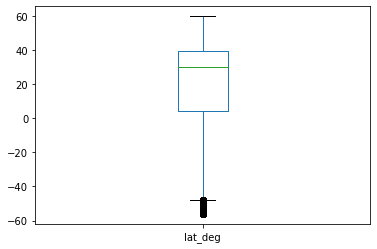

In [276]:
plot_boxplot(df_no_dupli, "lat_deg")

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat_deg', ylabel='Density'>

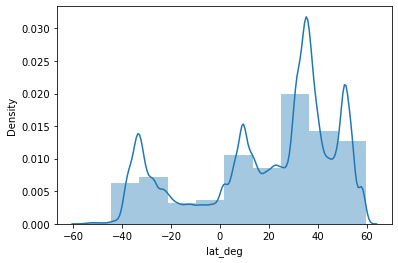

In [277]:
sns.distplot(df_no_dupli['lat_deg'], bins=10)

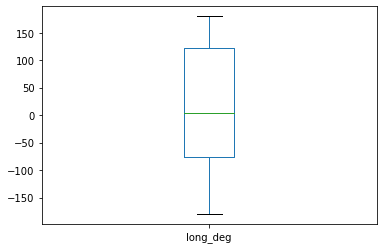

In [278]:
plot_boxplot(df_no_dupli, "long_deg")

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='long_deg', ylabel='Density'>

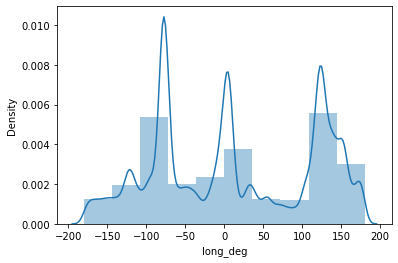

In [279]:
sns.distplot(df_no_dupli['long_deg'], bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8051419160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8051419820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8051409dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8051419ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8051423280>],
 'means': []}

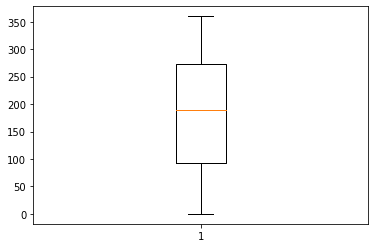

In [280]:
plt.boxplot(df_no_dupli["course"])

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='course', ylabel='Density'>

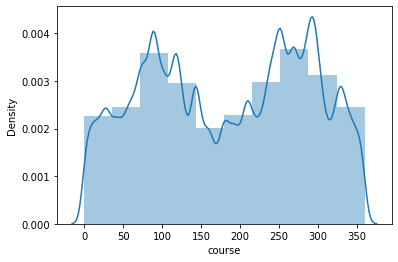

In [281]:
sns.distplot(df_no_dupli['course'], bins=10)

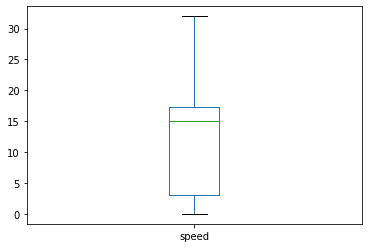

In [282]:
plot_boxplot(df_no_dupli, "speed")

<AxesSubplot:xlabel='speed', ylabel='Count'>

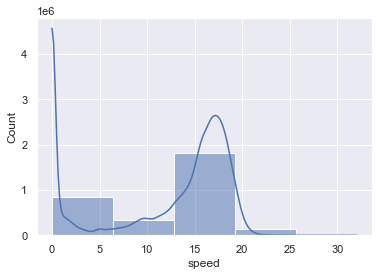

In [283]:
sns.set(style="darkgrid")
sns.histplot(data=df_no_dupli, x="speed", kde=True, bins=5)

/Users/eli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

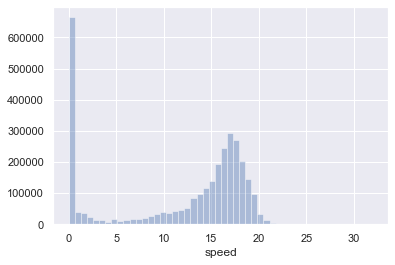

In [284]:
# Plot the histogram by distplot function
sns.distplot( a=df_no_dupli["speed"], hist=True, kde=False, rug=False)

In [285]:
Q1 = df_vessel.speed.quantile(0.25)
Q3 = df_vessel.speed.quantile(0.75)
Q1, Q3

(3.0, 17.278624)

In [286]:
IQR = Q3 - Q1
IQR

14.278624

In [287]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-18.417936, 38.696560000000005)

In [288]:
df_vessel[(df_vessel.speed<lower_limit) | (df_vessel.speed>upper_limit)]

,name,timestamp,latitude_deg,longitude_deg,course,speed,in_port,OP_CODE_NAME_SHORT


### Z-score

In [289]:
df_vessel.speed.mean()

11.678509820924884

In [290]:
df_vessel.speed.std()

7.212701015088185

In [291]:
upper_limit = df_vessel.speed.mean() + 3*df_vessel.speed.std()
upper_limit


33.31661286618944

In [292]:
lower_limit = df_vessel.speed.mean() - 3*df_vessel.speed.std()
lower_limit

-9.95959322433967

In [293]:
df_vessel[(df_vessel.speed<lower_limit) | (df_vessel.speed>upper_limit)]

,name,timestamp,latitude_deg,longitude_deg,course,speed,in_port,OP_CODE_NAME_SHORT


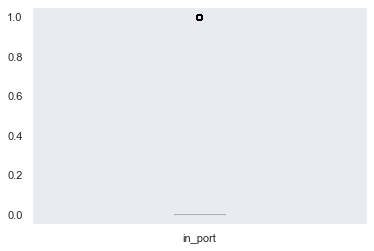

In [294]:
plot_boxplot(df_vessel, "in_port")

KeyError: "None of [Index(['op_code'], dtype='object')] are in the [columns]"

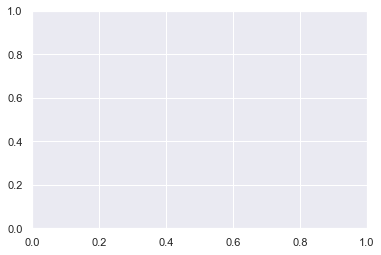

In [295]:
plot_boxplot(df_vessel, "op_code")

In [ ]:
plt.hist(df_vessel['op_code'], 10)

In [ ]:
sns.distplot(df_vessel['op_code'], bins=10)

In [ ]:
plt.hist(df_vessel['in_port'], 10)

# 

In [ ]:
sns.distplot(df_vessel['in_port'], bins=10)

In [ ]:
df_vessel['in_port'].dtype

In [ ]:
df_vessel['in_port'].astype

In [ ]:
df_vessel['op_code'].dtype

In [ ]:
df_vessel.columns

In [ ]:
df_vessel['op_code'].astype

In [ ]:
df_vessel['long_deg'].dtype

In [ ]:
df_vessel['lat_deg'].dtype

In [ ]:
df_vessel['speed'].dtype

In [ ]:
df_vessel['op_code']

In [ ]:
plt.style.use('seaborn')
plt.scatter(df_no_dupli['speed'], df_no_dupli['in_port'],edgecolor='black',linewidth=1,alpha=0.75)
plt.title('vessel operation mode')
plt.xlabel('speed')
plt.ylabel('operation mode')
plt.tight_layout()


## Feature Selection

In [198]:
#Univariate Feature Selection with SelectKBest function
#extract X features and y target
new_df = new_df_no_outlier.drop(columns=["timestamp", "name"])
X= new_df.drop(columns=["op_code"])
y= new_df['op_code']

uni = SelectKBest(score_func = f_classif, k = 4)
fit = uni.fit(X, y)

In [199]:
X.columns[fit.get_support(indices=True)].tolist()

['lat_deg', 'long_deg', 'speed', 'in_port']

<AxesSubplot:>

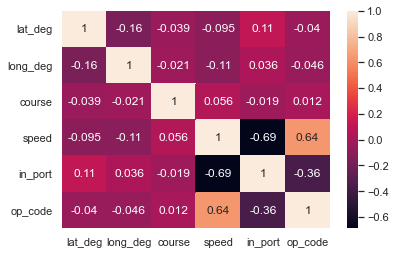

In [357]:
#Feature Selection Using Correlation Matrix
cor = new_df_no_outlier.corr()
sns.heatmap(cor, annot=True)

In [358]:
#Correlation with output variable
cor_target = abs(cor["op_code"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

speed      0.642783
in_port    0.363821
op_code    1.000000
Name: op_code, dtype: float64

In [197]:
print(df_no_outlier[["speed","in_port"]].corr())

            speed   in_port
speed    1.000000 -0.676794
in_port -0.676794  1.000000
